UC Berkeley - Physics 5CL

# Statistics Jupyter Notebook

This notebook is a supplement to the Statistics Reference Sheet. Here, I provide examples of all of the calculations mentioned in the Reference Sheet using Python. In particular, I take advantage of numpy, scipy and matplotlib. An extra section is included here for nonlinear curve fitting. 

## <font color=blue>Some Useful Python Commands for Handling Data</font>
Below we load the relevant packages for this document, *numpy*, *scipy*, *pandas* and *matplotlib*:

In [20]:
import numpy as np
import scipy.optimize as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print(plt.style.available)
plt.style.use('bmh')

['seaborn-darkgrid', 'Solarize_Light2', 'seaborn-notebook', 'classic', 'seaborn-ticks', 'grayscale', 'bmh', 'seaborn-talk', 'dark_background', 'ggplot', 'fivethirtyeight', '_classic_test', 'seaborn-colorblind', 'seaborn-deep', 'seaborn-whitegrid', 'seaborn-bright', 'seaborn-poster', 'seaborn-muted', 'seaborn-paper', 'seaborn-white', 'fast', 'seaborn-pastel', 'seaborn-dark', 'tableau-colorblind10', 'seaborn', 'seaborn-dark-palette']


Here are some useful commands for handling data in spreadsheets:

       data  time
0  5.900188     0
1  6.384611     1
2  4.919017     2
3  7.510949     3
4  7.596684     4


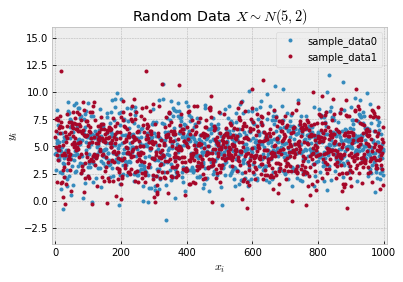

In [21]:
# normally distributed random numbers y~Norm(5,2)
N = 1000
x = np.arange(0,N,1)
y = np.random.normal(5,2,N)

# Create pandas DataFrame from arrays
df = pd.DataFrame({
    'time': x, 
    'data': y
})

# Read data from csv
df1 = pd.read_csv('sample_data1.csv')

# Read beginnig of datafram
print(df1.head())

# Make arrays from DataFrame
x1 = df1['time']
y1 = df1['data']

# Write DataFrame data to csv
df.to_csv('sample_data1.csv', index=False)

# Plot Data
plt.plot(x,y,'.', label='sample_data0')
plt.plot(x,y1,'.', label='sample_data1')

plt.title(r'Random Data $X \sim N(5,2)$')
plt.xlabel(r'$x_i$')
plt.ylabel(r'$y_i$')
plt.legend()
plt.grid(True)
plt.xlim((-10,1010))
plt.ylim((-4,16))

plt.show()

# <font color=blue>A Note on Notation</font>

One of the common frustrations as a physicist (or a mathematician) is that everyone has their own favorite notations and conventions. Your author is no exception, unfortunately. I will, however, tell you what my notational conventions
mean! This mainly applies to the statistical analyses that we will run. A supplement on data analysis using my
notation is available.
- When referencing an arbitrary individual data point I will use a lowercase subscript (usually an $i$) to indicate the index. _Example_: The $i^{\rm th}$ measurement of a position variable $x$ is written $x_i$ .
- Curly braces indicate the set of measurements. _Example:_ The set of position measurements is written $\{x_i\}$.
- The mean of a variable is indicated with triangular brackets. _Example:_ The mean of the position data $\{x_i\}$ is written $\langle x \rangle$.
  - Another commonly used notation is to use an overbar, $\overline{x}$, though I will not be using this notation in these notes. The reason I use the bracket notation is that it is easier (for me at least) to distinguish $\langle x^2 \rangle$ from $\langle x \rangle^2$ than it is to distinguish $\overline{x^2}$ from $\overline{x}^2$. Similarly, it is easier for me to distinguish $\langle xy \rangle$ from $\langle x \rangle \langle y \rangle$ than it is to distinguish $\overline{xy}$ from $\overline{x}\,\overline{y}$.
- Individual sources of error or uncertainty will be labeled with capital deltas in front of the symbol and a subscript indicating the source of error. _Example:_ The reading uncertainty for position measurements $x$ is written $\Delta x$ read. This error applies for all data points $x_i$ so subscript may be omitted. However, the observational uncertainty differs from measurement to measurement so I will write observational uncertainties as $\Delta x_{\rm obs,i}$ .
- The total uncertainty in a quantity will be labeled with a lowercase delta in front of the symbol. _Example:_ The total uncertainty in a position measurement $x_i$ is written $\delta x_i$.
- Standard deviations will be written as a lowercase sigma with a subscript indicating the variable. _Example:_ The standard deviation of a set of position measurements $\{x_i\}$ is written $\sigma_x$.
- Best-fit parameter values will be written with a hat. _Example:_ If we are fitting data $\{x_i, y_i\}$ with a linear regression hypothesis $y = mx$ then the best-fit value for the slope is written $\hat{m}$.

## <font color=blue>Section 1: Statistical Measures for a Single Variable $\{y_i\}$</font>

In [22]:
N = 100
y = np.random.random_sample((N,)) # array of N random numbers sampled uniformly from [0,1)

**Mean:** $$ \langle y \rangle = \frac{1}{N} \sum_{i=1}^{N} y_i \tag{1.1}$$

In [23]:
# Calculate mean using the definition.
y_mean1 = np.sum(y) / len(y)
print("y_mean1 = {}".format(y_mean1))

# Calculate mean using numpy.
y_mean2 = np.mean(y)
print("y_mean2 = {}".format(y_mean2))

y_mean1 = 0.509374777905
y_mean2 = 0.509374777905


**Deviation from the Mean:** $$ \epsilon_i = y_i - \langle y \rangle \tag{1.2}$$

In [24]:
eps = y - y_mean1  # subtract a constant from every entry in y array

**Variance:** $$ \sigma_y^2 = \langle \epsilon^2 \rangle = \frac{1}{N} \sum_{i=1}^{N} (y_i - \langle y \rangle)^2 = \langle y^2 \rangle - \langle y \rangle^2 \tag{1.3}$$

In [25]:
# Calculate variance using definition
y_var1 = np.sum(eps**2) / N
print("y_var1 = {}".format(y_var1))

# Calculate variance using numpy
y_var2 = np.var(y)
print("y_var2 = {}".format(y_var2))

y_var1 = 0.0693936792214
y_var2 = 0.0693936792214


**Standard Deviation (Parent):** $$ \sigma_y = \sqrt{\langle y^2 \rangle - \langle y \rangle^2} \tag{1.4a}$$

In [26]:
# Calculate population standard deviation using definition
y_std1 = np.sqrt(y_var1)
print("y_std1 = {}".format(y_std1))

# Calculate population standard deviation using numpy
y_std2 = np.std(y, ddof=0)
print("y_std2 = {}".format(y_std2))

y_std1 = 0.2634268005
y_std2 = 0.2634268005


**Standard Deviation (Sample):** $$ s_y = \sqrt{\frac{N}{N-1}} \sigma_y = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} \epsilon_i^2} \tag{1.4b}$$

In [27]:
# Calculate sample standard deviation using definition
y_sstd1 = np.sqrt(np.sum(eps**2) / (N-1))
print("y_sstd1 = {}".format(y_sstd1))

# Calculate sample standard deviation using numpy
y_sstd2 = np.std(y, ddof=1)
print("y_sstd2 = {}".format(y_sstd2))

y_sstd1 = 0.264753896055
y_sstd2 = 0.264753896055


**Standard Error:** $$ \sigma_{\langle y \rangle} = \frac{s_{y}}{\sqrt{N}} \tag{1.5}$$

In [28]:
# Calculate sample standard error using definition
sigma_y1 = y_sstd1 / np.sqrt(N)
print("sigma_y1 = {}".format(sigma_y1))

sigma_y1 = 0.0264753896055


The difference between parent and sample statistics only becomes significant if the number of data points is low. If you have roughly 5 or more data points you can pretty safely ignore the distinction.

The standard deviation represents the uncertainty of a single measurement and the standard error represents the uncertainty in the mean of multiple measurements.

- _Example_ [[1](#footnote1)]: If I measure the spring constant $k$ of a spring a number of times to get data $\{k_i\}$ I would report the result as $k = \langle k \rangle \pm \sigma_{\langle k \rangle}$ . Given ten measurements (in N/m) $\{k_i\} = \{86, 85, 84, 89, 85, 89, 87, 85, 82, 85\}$, the final answer would be presented as $k = 85.7 \pm 0.7$ N/m. The sample standard deviation is $\sigma_k = 2.2$ N/m. If I were to perform the same experiment _once_ on a different spring, finding a value of $k = 71$ N/m then I would report $k = 71 ± 2$ N/m, and I would have roughly 68% confidence that the true spring constant was within 2 N/m of 71 N/m.

In [29]:
kvals = np.array([86,85,84,89,85,89,87,85,82,85])

N = len(kvals)               # Number of values
k_avg = np.mean(kvals)       # Mean
s_k = np.std(kvals, ddof=1)  # Standard deviation, sqrt(1/(N-ddof) * sum (x - <x>)^2)
k_sterr = s_k / np.sqrt(N)   # Standard error, 

print("N = {} \n\
The average is {} \n\
The sample standard deviation is {} \n\
The standard error is {}".format(N, k_avg, s_k, k_sterr))

N = 10 
The average is 85.7 
The sample standard deviation is 2.162817093 
The standard error is 0.683942817623


## <font color=blue>Section 2: Statistical Measures for Two Variables $\{x_i, y_i\}$</font>

In [30]:
# Random data
N = 100
x = np.random.random_sample((N,)) # random array of data [0,1)
y = np.random.random_sample((N,)) # random array of data [0,1)

**Covariance:** $$ \sigma_{xy} = \frac{1}{N} \sum_{i=1}^{N} (x_i - \langle x \rangle)(y_i - \langle y \rangle) = \langle xy \rangle - \langle x \rangle \langle y \rangle \tag{2.1}$$

In [31]:
# Calculate covariance using definition
epsx = x - np.mean(x)  # deviations from mean
epsy = y - np.mean(y)
cov_xy1 = np.sum(epsx*epsy) / N
print("cov_xy1 = {}".format(cov_xy1))

# Calculate covariance using numpy
cov_xy2 = np.cov(x,y,ddof=0)[0,1]    # (0,1) component of the covariance matrix
print("cov_xy2 = {}".format(cov_xy2))

cov_xy1 = -0.00784222383812
cov_xy2 = -0.00784222383812


**Coefficient of Linear Correlation:** $$ r_{xy} = \frac{\sigma_{xy}}{\sigma_{x} \sigma_{y}} \tag{2.2}$$

In [32]:
# Calculate coefficient of linear correlation using the definition
r_xy = cov_xy1 / (x.std() * y.std())
print("r_xy = {}".format(r_xy))

# Calculate coefficient of linear correlation using numpy
r_xy = np.corrcoef(x,y)[0,1]    # (0,1) component of the correlation coefficient matrix
print("r_xy = {}".format(r_xy))

r_xy = -0.0966453785166
r_xy = -0.0966453785166


__The covariance roughly tells you how much $x$ and $y$ change together__. If larger $y_i$ values tend to be paired with greater $x_i$ values, then the covariance is positive. If larger $y_i$ values tend to be paired with smaller $x_i$ values, then the covariance is negative. The more _linear_ the relationship is between $x$ and $y$ the larger the covariance will be. The units of covariance are the units of $x$ times the units of $y$. 

Note that the variance of a variable is just the covariance of a variable with itself.

__The Coefficient of linear correlation tells you how linear the relationship between $x$ and $y$ is__. The correlation $r_{xy}$ will always lie between -1 and 1. The closer $|r_{xy}|$ is to 1 the stronger the linear relationship is between $x$ and $y$. The Sign of $r_{xy}$ gives the sign of the slope. 

Figure 1: Various data sets and their correlations. [[2](http://en.wikipedia.org/wiki/Correlation_and_dependence)]
![alt text](R_SVG_Plot.svg "Title")

### <font color=blue>Some examples of $r_{xy}$</font>

Coefficient of linear coefficient is -0.0175529899182


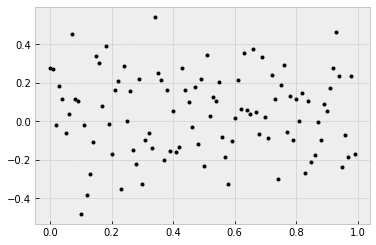

In [33]:
## Example 1
x = np.arange(0,1,0.01)
y = np.random.normal(np.zeros(100), 0.2) # Array of numbers randomly sampled from a normal distribution y~N(0,1)

plt.plot(x, y, 'k.')

r_xy = np.corrcoef(x,y)[0,1] 
print("Coefficient of linear coefficient is {}".format(r_xy))

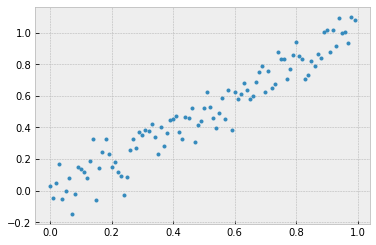

Coefficient of linear coefficient is 0.960698808282


In [34]:
## Example 2
x = np.arange(0,1,0.01)
y = x + np.random.normal(np.zeros(100),0.1)

plt.plot(x, y, '.')
plt.show()

r_xy = np.corrcoef(x,y)[0,1]
print("Coefficient of linear coefficient is {}".format(r_xy))

Coefficient of linear coefficient is -0.947776464


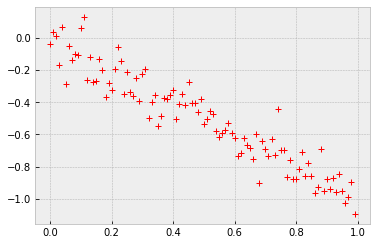

In [35]:
## Example 3
x = np.arange(0,1,0.01)
y = - x + np.random.normal(np.zeros(100),0.1)

plt.plot(x, y, 'r+')

r_xy = np.corrcoef(x,y)[0,1]
print("Coefficient of linear coefficient is {}".format(r_xy))

Coefficient of linear coefficient is -0.355432683887


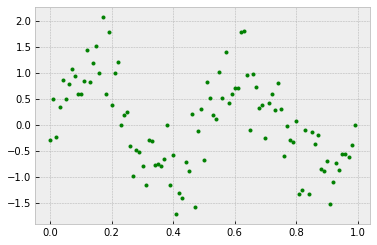

In [36]:
## Example 4
x = np.arange(0,1,0.01)
y = np.random.normal(np.sin(4*np.pi*x), 0.5)

plt.plot(x, y, 'g.')

r_xy = np.corrcoef(x,y)[0,1]
print("Coefficient of linear coefficient is {}".format(r_xy))

## <font color=blue>Section 3: Sources of Error and Uncertainty [[3](#footnote3)]</font>

Every measurement or piece of data comes with its own uncertainty - we never know the result of a measurement
exactly. There are many possible sources of uncertainty in any given measurement. An individual source of
uncertainty will be labeled with a capital delta and a subscript for the source.

#### <font color=blue>Errors associated with the instrument or procedure.</font>

These uncertainties derive from instrumental limitations, subjective choices, and methodology. They are two-sided (that is, the error can lead to either a higher or lower value) and result in a range of possible values for the measured quantity.
* ***Reading Uncertainty*** - The reading uncertainty is due to the *finite resolution* of our instruments. The reading uncertainty $\Delta y_{\rm read}$ is plus-or-minus one-half the resolution of the measurement.
    * A length reading for a typical analog ruler will have a reading error of $\Delta L_{\rm read} = 0.5\textrm{ mm}$.
    * The resolution of a digital instrument is given by the last digit displayed.
* ***Observational Uncertainty*** - The observational uncertainty is due to *judgment calls* that must be made during an observation. You can estimate it by taking half the difference between the bounds of your judgement.
    * When finding the location of an image, you will have to make a judgement call on the screen position for which the projection appears sharp. Your observational undertainty will be based on the two bounds where the projection can no longer be judged to be sharp.
* ***Counting Error*** - When dealing with occurrence counts of a random process (such as the decay of a radioisotope) there is an inherent statistical counting uncertainty that grows as the square root of your count. That is, given a count of $N$ the counting uncertainty is $\Delta N_{\rm count} = N$.

#### <font color=blue>Errors resulting from random fluctuations.</font>

These errors arise from random variations in the measurement technique or environmental conditions. The uncertainty associated with random fluctuations of the reading is evaluated by the standard error which therefore requires multiple measurements. Like the instrumental errors, random errors are two-sided and contribute to the spread of the data.

#### <font color=blue>Systematic errors.</font>

* ***Calibration Error*** - A poor calibration of an instrument results in a biased reading (for example, a scale that was not correctly calibrated may systematically read $2g$ above the correct value). Note that such an error is *one-sided* and therefore produces an overall shift in the measured values but does not contribute to the spread of the experimental data. For that reason, there is no uncertainty associated with it, but it can be accounted for by subtracting the offset value from all the measured values. 

    * The calibration error may be refered to in certain instruments as a ***DC offset***.
    
* ***Environmental Bias*** - Any non-random variation of the experimental conditions (temperature, humidity, magnetic field, etc.) may also result in a biased reading. However in this case, since the cause is generally unknown, the error cannot be eliminated and produces a shift in the data

#### <font color=blue>Some things to watch out for.</font>

* ***Blunders*** do not belong to any of the previous categories because they are just gross human mistakes (wrong units, wrong readings, leaning on the scale while measuring a mass, etc.) that should be avoided.

* A sudden change in the environmental conditions (power surge, mechanical vibration) can drastically alter the reading of the measured quantity and result in an anomalous reading. The corresponding data points appear as outliers on a plot and should be ignored for a meaningful data analysis.

* For a quantity that which is calculated based on a model using measured quantities, there is an additional source of error which is the ***theoretical*** or ***modeling error***. For example, modeling a pendulum as a perfect simple harmonic oscillator ignores the deviations that occur when the amplitude of oscillation is large. Such deviations at contribute to the theoretical error.
<div class="alert alert-block alert-info">
When designing and carrying out an experimental procedure, your goal is to reduce systematic and instrumentation errors and to minimize random  errors.
</div>

#### <font color=blue>Reporting a Measurement with Uncertainty</font>

The total uncertainty in a measurement is written with a lowercase delta, $\delta y$. A reported measurement should be presented with the central value along with the uncertainty. If the central value is $y$ and the total uncertainty is $\delta y$ then the reported measurement would be written "$y \pm \delta y$", with units placed at the end of the expression.

By their very nature, the experimental uncertainties discussed earlier are uncertain! We are estimating magnitudes.
Therefore, it is improper to be too precise with a reported uncertainty. Experimental uncertainties should be quoted
only to one significant figure (though if the leading digit of your uncertainty is a 1 then a second significant figure
may sometimes be added).

Precision of an experimental result is implied by the number of digits. The total uncertainty should be rounded so as
to keep only one significant figure, with exceptions. The reported value of the measured quantity should be written so
as to match the precision given by the total uncertainty.

* _Example:_ If you measure a length of 31.89 cm with a ruler with a total uncertainty of 0.57 cm, then you would report the result as 31.9 ± 0.6 cm.

#### <font color=blue>The Total Uncertainty</font>

Given ***independent*** sources error and uncertainty, the total uncertainty δy is found by adding the individual errors in quadrature,
$$ \delta y = \sqrt{\Delta y_1^2 + \Delta y_2^2 + \cdots}.$$
For a quick estimate of the total uncertainty, note that $\delta y$ will always be larger than the largest individual source of
uncertainty (call this $\Delta y_1$) and smaller than the sum of all the sources of uncertainty, $\Delta y_1 \leq \delta y \leq \sum \Delta y_i$.

**Note**: If you take multiple measurements of the same quantity $y$, with a reading uncertainty $\Delta y_{\rm read}$ and a standard error $\sigma_{\langle y \rangle}$, then the total reported uncertainty is $\delta y_{\rm tot} = \sqrt{\Delta y_{\rm read}^2 + \sigma_{\langle y \rangle}^2}$.

#### <font color=blue>Relevant and Irrelevant Sources of Error and Uncertainty.</font>

There will *always* be *many* sources of error and uncertainty for any measurement or calculation. When computing the total uncertainty we can safely ignore some sources of error as long as they don’t appreciably change the calculation of the total uncertainty. (Your tolerance for what is an appreciable change is of course subjective, though). The relevance of any individual source of uncertainty for a measurement is based on the *largest* source of uncertainty for that measurement. For example, consider the following table showing possible reading and observational uncertainties for a position measurement of $y = 2.06 \textrm{ m}$:
  
| Trial | $\Delta y_{\rm read}$ (m) | $\Delta y_{\rm obs}$ (m) | $\delta y$ (m) | Deviation of $\delta y$ from largest uncertainty | Reported Measurement (m) |
|---|----------|----------|--------|-------|-------------|
| 1 | 0.05     | **0.4**  | 0.403  | 0.74% | 2.1 ± 0.4   |
| 2 | **0.05** | **0.04** | 0.403  | 21.9% | 2.06 ± 0.06 |
| 3 | **0.05** | 0.004    | 0.0502 | 0.32% | 2.06 ± 0.05 |


If a given source of uncertainty is roughly an order of magnitude smaller than the largest source of uncertainty then
its effects get drowned out, as seen in Trial 1 - where the total uncertainty is only 0.74% larger than the observational
uncertainty - and in Trial 3 - where the total uncertainty is only 0.32% larger than the reading uncertainty. When a
given source of uncertainty is of the same order of magnitude as the largest source of uncertainty as in Trial 2 then we
need to take both sources of uncertainty into account.

## <font color="blue">Section 4: Propagation of Uncertainty</font>

## <font color="blue">Section 5: Regression</font>
Suppose we have a data set of two variables, $\{x_i, y_i\}$ and we hypothesize a mathematical relationship $y(x; a_n)$, where $\{a_n\}$ are some set of undetermined parameters. Our goal is to determine the parameters that result in the best fit of our hypothesis to the data. If we are fitting the data to a line, as we are in this example, then we call the procedure a ***linear regression***.

### <font color=blue>5.1 — Simple Least-Squares Approach</font>
If the errors and uncertainties in all of our data points are the same then we can perform a regression based on a ***simple least-squares approach***. Consider a hypothesis $y(x; a_n)$, where $\{a_n\}$ are a set of parameters for the function $y(x)$. We define a function $Q(a_n)$ that is a cumulative measure of how far off our data points are from a hypothesis with parameters $\{a_n\}$,

$$ Q(a_n) = \sum (y_i - y(x_i; a_n))^2 \tag{5.1.1}$$

$Q(a_n)$ is the sum of the squares of the residuals—how far off each $y_i$ value is from the predicted value $y(x_i; a_n)$. The best-fit values $\{\hat{a}_n\}$ are found by minimizing $Q(a_n)$ simultaneously with respect to all parameters $\{a_n\}$.

If $y(x;a_n)$ is a linear function then we can minimize $Q(a_n)$ in a fairly straightforward manner to get the best-fit
parameters.

#### <font color=blue>The Linear Hypothesis, $y(x) = mx + b$:</font>
Hypothesis: $$ y(x; m,b) = mx + b \tag{5.1.2} $$

Best-fit parameters: $$\hat{m} = \frac{\sigma_{xy}}{\sigma_x^2} = \frac{\langle xy \rangle - \langle x \rangle \langle y \rangle}{\langle x^2 \rangle - \langle x \rangle^2}, \tag{5.1.3a}$$
$$ \hat{b} = \langle y \rangle - \hat{m}\langle x \rangle = \frac{\langle xy \rangle - \langle x \rangle\langle y \rangle}{\langle x^2 \rangle - \langle x \rangle^2} \tag{5.1.3b} $$

Uncertainties in $y$ based on fit: $$\delta y = \sqrt{\frac{1}{N-2} \sum \left(y_i - y(x_i; \hat{m}, \hat{b})\right)^2}$$

Uncertainties in best-fit parameters: $$\delta \hat{m} = \frac{\delta y}{\sqrt{N\sigma_x^2}}  \tag{5.1.5a}$$
$$ \delta\hat{b} = \sqrt{\langle x^2 \rangle} \, \delta \hat{m} = \delta y \sqrt{\frac{\langle x^2 \rangle}{N\sigma_x^2}} \tag{5.1.5b} $$

#### <font color=blue>The Direct Proportionality Hypothesis (Linear Hypothesis through the Origin), $y(x) = mx$:</font>
Hypothesis: $$y(x; m) = mx \tag{5.1.6}$$

Best-fit parameters: $$\hat{m} = \frac{\sum w_i x_i y_i}{\sum w_i x_i^2} \tag{5.1.7}$$

Uncertainties in $y$ based on fit: $$\delta y = \sqrt{\frac{1}{N-2} \sum \left(y_i - y(x_i; \hat{m}, \hat{b})\right)^2} \tag{5.1.8}$$

Uncertainties in best-fit paramters: $$\delta \hat{m} = \frac{\delta y}{\sqrt{N \langle x^2 \rangle}} \tag{5.1.9} $$

### <font color=blue>5.2 — Weighted Least-Squares Approach [[6](#footnote6)]</font>
We use a ***weighted* least-squares approach** when we have unequal errors and uncertainty in our data points. Suppose we have uncertainties $\delta x$ and $\delta y$ in our independent and dependent variables. The first thing we need to do is *eliminate* the uncertainty in $x$. We do this by performing a simple least-squares linear regression to find a best-fit slope $\hat{m}_{\rm simple}$. Then we exchange the uncertainty in $x$ for additional uncertainty in $y$,
$$ \delta y_{\textrm{equiv},i} = \sqrt{\delta y_i^2 + \left( \hat{m}_{\rm simple} \delta x_i \right)^2}. \tag{5.2.1}$$
We want data points with low uncertainty to “matter more” than data points with high uncertainty so we attach a
weight to each data point,
$$ w_i = \frac{1}{\left(\delta y_{{\rm equiv},i}\right)^2}. \tag{5.2.2} $$
This weight gets attached to our $Q$ from earlier,
$$ Q(a_n) = \sum w_i \left(y_i - y(x_i; a_n)\right)^2 = \sum \left(\frac{y_i - y(x_i; a_n)}{\delta y_{{\rm equiv},i}}\right)^2. \tag{5.2.3} $$

#### <font color=blue>The Linear Hypothesis, $y(x) = mx + b$:</font>
Hypothesis: $$ y(x; m,b) = mx + b \tag{5.2.4} $$

Best-fit parameters: $$\hat{m} = \frac{\sum w_i \sum w_i x_i y_i - \sum w_i x_i \sum w_i x_i y_i}{\sum w_i \sum w_i x_i^2 - \left(\sum w_i x_i \right)^2} \tag{5.2.5a}$$
$$ \hat{b} = \frac{\sum w_i x_i^2 \sum w_i y_i - \sum w_i x_i \sum w_i x_i y_i}{\sum w_i \sum w_i x_i^2 - \left(\sum w_i x_i\right)^2} = \frac{\sum w_i y_i - \hat{m} \sum w_i x_i}{\sum w_i} \tag{5.2.5b} $$

Uncertainties in best-fit parameters: $$\delta \hat{m} = \sqrt{\frac{\sum w_i}{\sum w_i \sum w_i x_i^2 - \left(\sum w_i x_i \right)^2}} \tag{5.2.6a}$$
$$ \delta\hat{b} = \sqrt{\frac{\sum w_i x_i^2}{\sum w_i \sum w_i x_i^2 - \left( \sum w_i x_i \right)^2}} \tag{5.2.6b} $$

#### <font color=blue>The Direct Proportionality Hypothesis (Linear Hypothesis throug the Origin), $y(x) = mx$:</font>
Hypothesis: $$y(x; m) = mx \tag{5.2.7}$$

Best-fit parameters: $$\hat{m} = \frac{\sum w_i x_i y_i}{\sum w_i x_i^2} \tag{5.2.8}$$

Uncertainties in best-fit paramters: $$\delta \hat{m} = \sqrt{\frac{1}{N-1} \frac{\sum (y_i - \hat{m} x_i)^2}{\sum x_i^2}} \tag{5.2.9} $$

#### <font color=blue>Comparison with Unweighted Least-Squares:</font>
If all of the weights are identical then the weighted least-squares formulas for Eqs. 5.1.2 through 5.1.9 are identical to those in Eqs. 5.2.4 through 5.2.9. In fact, we can make the formulas in Section 5.1 work for the weighted approach by replacing the mean with the weighted mean,

Weighted Mean: $$ \langle y \rangle = \frac{\sum w_i y_i}{\sum w_i} \tag{5.2.10} $$

Of course we have to be careful to use the weighted means in Eqs. 1.3 and 2.1 when variances occur in the formulas.

### <font color=blue>5.3 — Other Hypotheses</font>

#### <font color=blue>Linearizing a Non-Linear Relationship</font>
For other functional relationships we can try to “linearize” the problem. For example, consider a power-law hypothesis, $y = Ax^n$ , where $A$ and $n$ are our two parameters. To linearlize the problem we define two new variables $w \equiv \ln{x}$ and $z \equiv \ln{y}$. Taking the logarithm of both sides of $y = Ax^n$ gives a hypothesis $z = nw + (\ln{A})$, which is in the form of a linear relationship, with $\{n, \ln{A}\}$ serving as parameters $\{m, b\}$. Take care to propagate uncertainties in such a case. If your uncertainties in $y$ were all comparable they in general *won’t* be for $z$ and a weighted least-squares approach may be called for.

#### <font color=blue>Non-Linear Relationships which Can't be Linearized</font>
Sometimes you might get a particularly involved fuction that you are trying to fit to that can’t be easily linearized. We can still perform a fit by doing a simple or weighted least-squares fit! We just don’t necessarily have a closed-form solution to the best-fit parameters as we do with the linear hypotheses. In this case, we can run a Python script to find the parameters that minimize $Q(a_n)$. Note that all of the normal caveats that come with root-finding algorithms come into play here. For example, you may find a *local* minimum but not the *global* minimum.

##### Example: Fit gaussian curve
An example of fitting a Gaussian curve to noisy data. We use the model
$$ f(x; \mu, \sigma^2, c) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left[-\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2}\right] + c, $$
where $\mu$ (the mean), $\sigma^2$ (the variance) and $c$ (the dc offset) are the fit parameters.

In [37]:
# Create sample data. Gaussian curve with normally distributed noise.
variance = 0.7
mean = 3.67
c = 104.31

x = np.arange(0,10,0.01)
y = 1/np.sqrt(2*np.pi*variance)*np.exp(-0.5*(x-mean)**2/variance) + np.random.normal(0,0.05,len(x)) + c

df2 = pd.DataFrame({'x': x,'y': y}) 
df2.to_csv('sample_data2.csv')        # create csv from data. See also: to_excel()

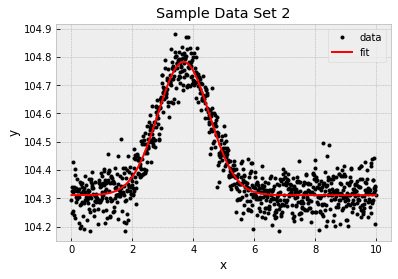

mean, variance, dc = [   3.68279876    0.71691982  104.31124848]


In [38]:
# define fitting function
def f(x, mean, variance, dc):
    return 1/np.sqrt(2*np.pi*variance)*np.exp(-0.5*(x-mean)**2/variance) + dc

# initial guesses (mean, variance, dc)
initialGuess = [4, 1, 104]

# perform curve fit (popt: fit paramters, pcov: covariance matrix)
popt, pcov = sp.curve_fit(f, x, y, initialGuess)

#plot data and fit (x,y: sample data, f(x,*popt): fit curve)
plt.plot(x,y,'k.', label='data')
plt.plot(x,f(x,*popt),'r-', label='fit')
plt.title("Sample Data Set 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print('mean, variance, dc = {}'.format(popt))

## <font color="blue">Section 6: Testing a Fit [[7](#footnote7)]</font>

### 6.1 — Agreement Tests
When you are directly comparing two values $x$ and $y$, you should run an agreement test. We first define the
discrepancy $\epsilon \equiv x - y$. Since $x$ and $y$ will typically carry uncertainty, the discrepancy itself will have an uncertainty $\delta\epsilon$, which we determine using Eq. 4.7 for propagating errors. If we expect that $x$ and $y$ should be equal, then an experiment should result in $\epsilon < \delta\epsilon$ roughly 68% of the time and $\epsilon < 2\delta\epsilon$ roughly 95% of the time. We have to choose a cutoff for when we can reasonably conclude that $x$ and $y$ agree based on our discrepancy test and, as in 5BL, we will choose the $2\delta\epsilon$ criterion. Our agreement test value is therefore

Agreement Test: $$ \frac{\left|x - y \right|}{2\delta\epsilon} = \frac{\left| x-y \right|}{2\sqrt{(\delta x)^2 + (\delta y)^2}}.$$

We claim agreement when the agreement test value is less than 1.
- *Example*: Suppose we are using a least-squares approach to compute the best-fit value for the acceleration due to gravity and find ĝ = 9.72 ± 0.05. The accepted value at our latitude is g acc = 9.80, which comes with an uncertainty δg acc = 0.01. The discrepancy is ϵ = 0.08 with uncertainty δϵ = 0.05. The agreement test value is therefore 0.8, which is less than 1 so we can claim our result is in agreement with the accepted value. Note that our result fails the more stringent requirement of ϵ < 1⋅δϵ.

<font color="red">ADD PYTHON EXAMPLE</font>


### 6.2 — "Goodness of Fit" [[8](#footnote8)]


### 6.3 — The  Coefficient of Determination
There are many different measures of how “good” a fit matches the data. The ***coefficient of determination*** $r^2$ , also called the “r-squared value,” is a measure of how much of the variance in the dependent variable $y$ is *explained* by the fit model due to the variance in the independent variable x. In other words,
<div class="alert alert-block alert-info">
$r^2$ is a test of whether data falls onto a given line in a “reasonable way.”
</div>

Coefficient of Determination: $$ r^2 = 1 - \frac{\sum \left( y_i - y(x_i; \hat{a}_n)\right)^2}{\sum\left( y_i - \langle y \rangle \right)^2} . \tag{6.3.1} $$

If a simple least-squares linear regression is used to create the fit model then $r^2$ will always lie between 0 and 1, with low values indicating a particularly poor fit and high values a particularly good fit. Note, however, that $r^2$ can go outside of these bounds if a different model. In particular, in a *weighted* least-squares linear regression, all sums in Eq. 5.4.1 should be replaced by *weighted* sums in order for $r^2$ to have the same interpretation.

A flaw in the use of r 2 is that the value can be pushed arbitrarily close to 1 with the addition of more independent variables. Therefore we define the ***adjusted coefficient of determination*** $\bar{r}^2$, also called the “r-bar-squared value,”

Adjusted Coefficient of Determination: $$ \bar{r}^2 = r^2 - \frac{p}{N-p-1}(1-r^2). \tag{6.3.2}$$

The $p$ in this formula is the number of independent variables ($p = 1$ in all of the regressions considered in this summary document). Note that there are a *lot* of subtleties in the interpretation of the coefficient of determination. [[9](#footnote9)].

The coefficient of determination is ***not appropriate*** for comparing predicted values to observed values (you would use an agreement test for that!).

Also note that our calculation of $r^2$ doesn’t incorporate or tell us anything about errors so is most appropriate for a ***simple least-squares fit***.

### 6.4 — Chi-Squared
A standard “hypothesis test” for whether a hypothesised model fits a given set of data is the ***chi-squared value***,

Chi-Squared: $$ \chi^2 = \sum \left( \frac{y_i - y(x_i; \hat{a}_n)}{\delta y_i} \right)^2. \tag{6.4.1} $$

Note that the chi-squared value is identical to the $Q$ in Eq. 5.2.3 used in the *weighted* least-squares approach. Each term in the sum is a ratio of the actual difference between a data point and the fit and a statistically expected standard variation of the dependent variable from the expected fit value. If our data points all lie within the naturally expected window of the fit curve then each term in the sum is roughly one or lower. Data points that lie outside the expected variation will contribute terms greater than one.

To adjust for the number of data points we create the ***modified*** or ***reduced chi-squared*** value,

Reduced Chi-Squared: $$ \tilde{\chi}^2 = \frac{\chi^2 }{ \nu} \tag{6.4.2} $$

The quantity $\nu$ in Eq. 5.4.4 is the number of ***degrees of freedom*** for the system, defined as the number of data points minus the number of parameters in your fit. For example, the linear  hypothesis fits two parameters so $\nu = N-2$ and the direct proportionality hypothesis fits one parameter so $\nu = N-1$.

For this class, we are more often looking to test whether our *data* is appropriate based on a given model rather than whether a model is a good fit to our data. It is a subtle point but an important one. In this lab class we are really **developing** our laboratory skills, so we need to hone our data-acquisition methods, using well-established theory to check our progress.

Given good data with well-understood and constrained errors and an appropriate model, $\tilde{\chi}^2$ should be close to one. There are many reasons why $\tilde{\chi}^2$ may be significantly greater (or less than!) 1, however.

- If $\tilde{\chi}^2 > 1$ then the data and/or model is falling outside the expected uncertainty range. The larger $\tilde{\chi}^2$ is, the less likely the discrepancy is due to random statistical variations. Therefore, if $\tilde{\chi}^2 \gg 1$ then our ***results are suspect***. There are a few possibility for why this occurs.
  - Your hypothesis is incorrect.
  - Your *uncertainties* are incorrect. You may have incorrectly evaluated the uncertainties or made invalid assumptions about them. [*This is the more likely scenario for the 5-series labs!*]
- If $\tilde{\chi}^2 < 1$ then the model is falling within the expected uncertainty range. If $\tilde{\chi}^2 \ll 1$ then our results are ***also suspect*** since it indicates that the actual variation of the data is not as large as a normal distribution based on your uncertainty calculations have suggested! This suggests that you have underestimated the errors. 

We may ask what “close to 1” means for evaluating $\tilde{\chi}^2$. The answer depends on a number of factors including the numbder of degrees of freedom $\nu$; the more degrees of freedom you are considering the closer you need $\tilde{\chi}^2$ to be to 1. Hughes and Hase Section 8.4 addresses this. The general guidelines suggested by them are:
- If $\tilde{\chi}^2 \ll 1$, check your calcuations for the uncertainties in the measurements.
- The hypothesis or data is questioned if:
  - *$\tilde{\chi}^2 > 2$ for $\nu \approx 10$.*
  - *$\tilde{\chi}^2 > 1.5$ for the approximate range $50 < \nu < 100$*.


## Notes
<a id="footnote1">[1]</a> This example is presented in Taylor, *An Introduction to Error Analysis*, Chapter 4.

<a id="footnote2">[2]</a> http://en.wikipedia.org/wiki/Correlation_and_dependence

<a id="footnote3">[3]</a> In the 1990s, a group of professional metrologists published the Guide to the Expression of Uncertainty in Measurement to create an international standard on errors, uncertainties, and the distinction between the two. A copy of the revised edition published in 2008 is available on the course website.

<a id="footnote4">[4]</a> For a more thorough discussion see Taylor, *An Introduction to Error Analysis*, Chapter 3.

<a id="footnote5">[5]</a> For a more thorough discussion see Taylor, *An Introduction to Error Analysis*, Chapter 8.

<a id="footnote6">[6]</a> More information on a weighted least-squares approach can be found in Hughes and Hase, *Measurements and Their Uncertainties*, Section 6.3 or Bevington, *Data Reduction and Error Analysis*, Section 6.3.

<a id="footnote7">[7]</a> For a more thorough discussion see Hughes and Hase, *Measurements and Their Uncertainties*, Chapter 8 or Bevington, *Data Reduction and Error Analysis*, Chapter 11.

<a id="footnote8">[8]</a> Based on the discussion in Hughes and Hase, *Measurements and Their Uncertainties*, Chapter 8, Section 5.2.1.

<a id="footnote9">[9]</a> For another good summary of the interpretation and limitations of $r^2$, see http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit.
